In [286]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥ 1.0.1 is required
from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To save models
from joblib import dump

1.4.1.post1


## Loading the data

In [287]:
# weather data
weather = pd.read_csv('data/weather.csv')
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


In [288]:
# sunrise-sunset data
sun = pd.read_excel('data/sunrise-sunset.xlsx')
sun.head()

,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [289]:
# solar data
solar = pd.read_csv('data/solar.csv')
solar.head()

,timestamp,kwh
0,2023-03-11 16:00:10.160454+01,0.54
1,2023-03-11 17:00:10.217795+01,1.02
2,2023-03-11 18:00:10.284064+01,1.17
3,2023-03-11 19:00:10.224836+01,1.18
4,2023-03-11 20:00:10.201847+01,1.18


## Take a quick look at the data structure of every data set

### weather

In [290]:
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


Observation:
- one row in every four rows in the data set represents the measurements of one weahter station at one timestamp

In [291]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          39840 non-null  object 
 1   the_geom                     39840 non-null  object 
 2   code                         39840 non-null  int64  
 3   timestamp                    39840 non-null  object 
 4   precip_quantity              6291 non-null   float64
 5   precip_range                 6417 non-null   float64
 6   temp                         39840 non-null  float64
 7   temp_min                     1660 non-null   float64
 8   temp_max                     1657 non-null   float64
 9   temp_grass_min               1189 non-null   float64
 10  wind_speed                   39827 non-null  float64
 11  wind_speed_unit              39840 non-null  int64  
 12  wind_direction               39414 non-null  float64
 13  wind_peak_speed 

Observation:
- There are a lot of attributes with a lot of null-values

In [292]:
weather["the_geom"].value_counts()

POINT (51.347375 3.201846)    9960
POINT (50.90398 3.121692)     9960
POINT (51.200341 2.887306)    9960
POINT (50.980293 3.816003)    9960
Name: the_geom, dtype: int64

In [293]:
weather["code"].value_counts()

6418    9960
6414    9960
6407    9960
6434    9960
Name: code, dtype: int64

Observation:
- the_geom and code both specify the weather station

In [294]:
# count the amount of cloudiness vlaues per code
weather[["code", "cloudiness"]].groupby("code").count()

,cloudiness
code,
6407,9763
6414,0
6418,5692
6434,0


Observation:
- only weather stations 6407 and 6418 have measured cloudiness values

In [295]:
weather.describe()

,code,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,wind_speed,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
count,39840.000000,6291.000000,6417.000000,39840.000000,1660.000000,1657.000000,1189.000000,39827.000000,39840.0,39414.000000,39815.000000,29880.000000,2802.000000,39828.000000,39840.000000,1245.000000,8.300000e+02,15455.000000
mean,6418.250000,0.965268,1.500078,11.857083,9.035602,15.101509,6.575442,4.887285,1.0,189.530342,8.477408,81.043618,43.602784,1013.377732,1011.530043,322.359036,1.070303e+07,5.490780
std,9.909085,2.478198,0.500039,5.858675,4.943259,6.517190,5.355668,2.688590,0.0,89.520098,4.183079,13.898511,34.207104,11.320142,11.333157,276.246995,7.921183e+06,2.583189
min,6407.000000,0.000000,1.000000,-5.900000,-6.000000,-1.000000,-10.200000,0.000000,1.0,0.100000,0.300000,24.700000,1.000000,965.100000,963.500000,0.000000,4.169000e+05,0.000000
25%,6412.250000,0.000000,1.000000,8.200000,6.000000,10.600000,3.200000,2.959000,1.0,135.900000,5.300000,72.500000,20.000000,1007.200000,1005.300000,54.000000,3.858250e+06,4.000000
50%,6416.000000,0.000000,2.000000,11.200000,9.100000,13.900000,7.000000,4.445000,1.0,206.500000,8.000000,84.200000,46.000000,1014.700000,1012.900000,268.000000,8.987750e+06,7.000000
75%,6422.000000,0.600000,2.000000,15.900000,12.525000,20.200000,10.300000,6.533000,1.0,250.000000,11.000000,92.000000,61.000000,1021.200000,1019.400000,537.000000,1.651740e+07,7.000000
max,6434.000000,43.400000,2.000000,32.400000,23.000000,32.900000,20.500000,21.088000,1.0,360.000000,31.100000,100.000000,162.000000,1041.800000,1040.400000,950.000000,2.943290e+07,8.000000


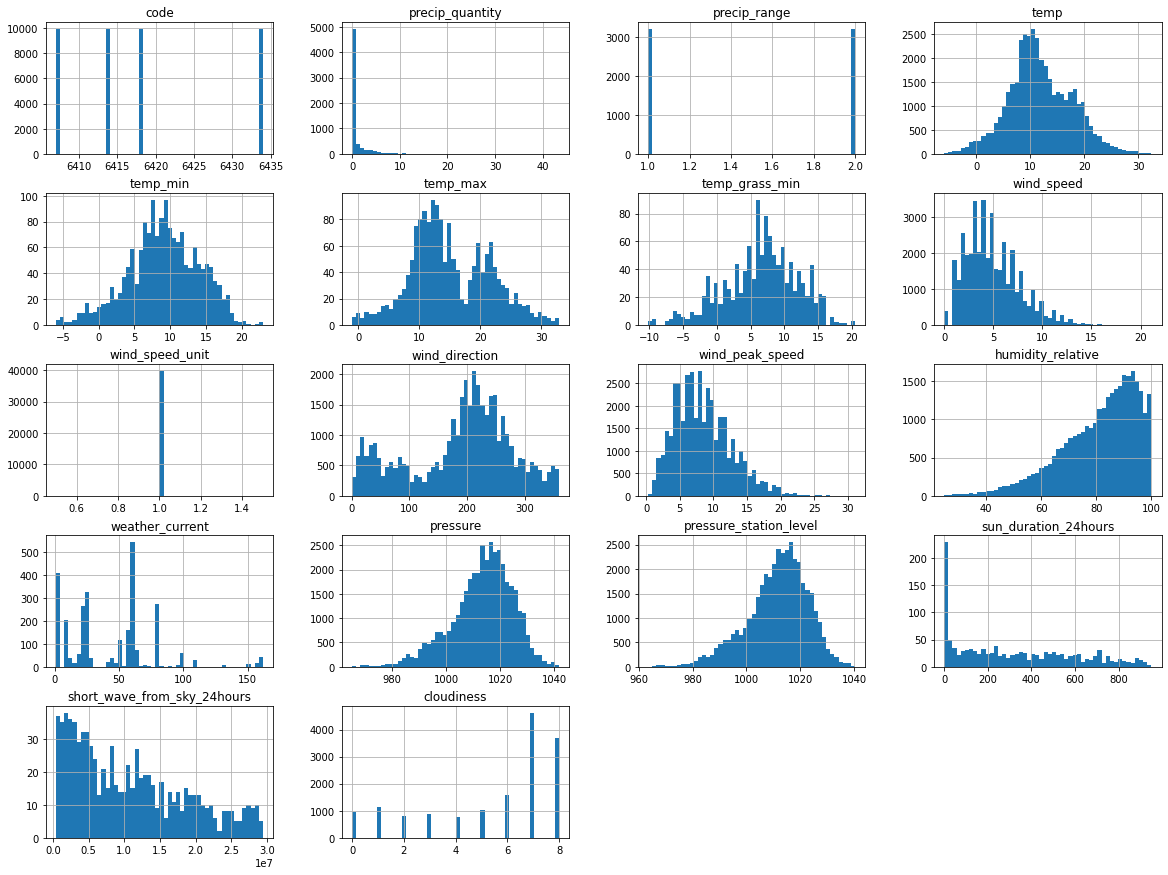

In [296]:
weather.hist(bins=50, figsize=(20,15))
plt.show()

Observations:
- wind_speed_unit has only one value -> not usefull
- code, precip_range, wind_spead and cloudiness are categroical
- precip_ranges only has two values -> not very usefull
- humidity_relative looks capped at 100
- sun_duration_24hours has a heavy tail

### solar

In [297]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  9705 non-null   object 
 1   kwh        9705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.8+ KB


In [298]:
solar.describe()

,kwh
count,9705.000000
mean,1401.190049
std,741.801205
min,0.000000
25%,772.572600
50%,1737.388200
75%,1964.015800
max,2417.478800


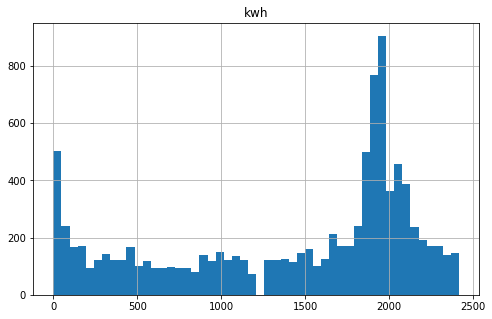

In [299]:
solar.hist(bins=50, figsize=(8, 5))
plt.show()

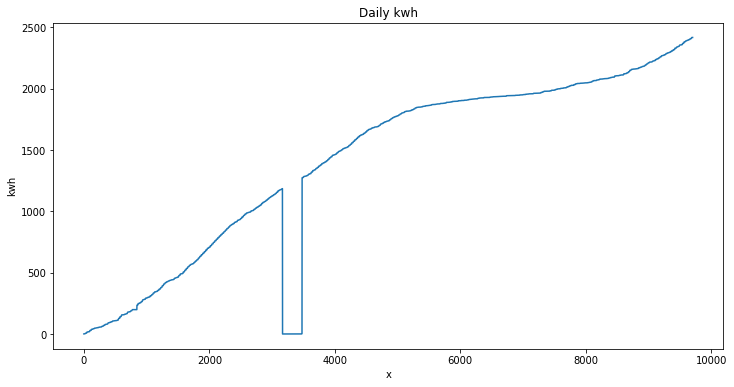

In [300]:
# plot kwh
plt.figure(figsize=(12, 6))
plt.plot(range(len(solar)), solar["kwh"])
plt.xlabel("x")
plt.ylabel("kwh")
plt.title("Daily kwh")
plt.show()

Observations:
- kwh is a cumulative value
- there are outliers

### sunrise-sunset

In [301]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datum           731 non-null    datetime64[ns]
 1   Opkomst         731 non-null    object        
 2   Op ware middag  731 non-null    object        
 3   Ondergang       731 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 23.0+ KB


In [302]:
sun[["Opkomst", "Op ware middag", "Ondergang"]].describe()

,Opkomst,Op ware middag,Ondergang
count,731,731,731
unique,195,56,283
top,05:29:00,13:39:00,16:37:00
freq,24,51,20


### merge weahter and solar datasets into one

In [303]:
# drop columns with more than 70% missing values
weather = weather.dropna(thresh=0.3*len(weather), axis=1)
# drop useless columns
weather.drop(columns=["FID", "the_geom", "code", "wind_speed_unit", "wind_direction", "pressure_station_level", "wind_peak_speed", "wind_speed"], axis=1, inplace=True)

In [304]:
weather.head()

,timestamp,temp,humidity_relative,pressure,cloudiness
0,2023-03-01T09:00:00,4.9,54.3,1029.7,0.0
1,2023-03-01T09:00:00,2.1,73.7,1029.3,NaN
2,2023-03-01T09:00:00,3.3,NaN,1029.6,1.0
3,2023-03-01T09:00:00,1.6,70.9,1029.4,NaN
4,2023-03-01T10:00:00,3.0,60.8,1028.8,NaN


In [305]:
print(len(weather))
weather = weather.groupby("timestamp").mean().reset_index()
print(len(weather))

39840
9960


In [306]:
# merge weather and solar
weather["timestamp"] = pd.to_datetime(weather["timestamp"], utc=True)
solar["timestamp"] = pd.to_datetime(solar["timestamp"], utc=True)
data = pd.merge_asof(solar, weather, on="timestamp", direction="nearest")

In [307]:
data.shape

(9705, 6)

In [308]:
data.head()

,timestamp,kwh,temp,humidity_relative,pressure,cloudiness
0,2023-03-11 15:00:10.160454+00:00,0.54,6.85,54.833333,1012.025,6.0
1,2023-03-11 16:00:10.217795+00:00,1.02,6.30,57.800000,1011.625,7.0
2,2023-03-11 17:00:10.284064+00:00,1.17,5.95,60.366667,1011.500,7.0
3,2023-03-11 18:00:10.224836+00:00,1.18,5.25,64.500000,1011.850,7.0
4,2023-03-11 19:00:10.201847+00:00,1.18,4.85,68.633333,1011.650,7.0


In [309]:
# clean weather timestamp data
data["timestamp"] = data["timestamp"].apply(lambda date: pd.to_datetime(date).strftime("%Y-%m-%d %H"))
# split timestamp into date and hour
data["date"] = data["timestamp"].apply(lambda date: date.split(" ")[0])
data["hour"] = data["timestamp"].apply(lambda date: date.split(" ")[1])
data.drop(columns=["timestamp"], inplace=True)
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,date,hour
0,0.54,6.85,54.833333,1012.025,6.0,2023-03-11,15
1,1.02,6.30,57.800000,1011.625,7.0,2023-03-11,16
2,1.17,5.95,60.366667,1011.500,7.0,2023-03-11,17
3,1.18,5.25,64.500000,1011.850,7.0,2023-03-11,18
4,1.18,4.85,68.633333,1011.650,7.0,2023-03-11,19


In [310]:
sun.rename(columns={"datum": "date", "Opkomst": "sunrise", "Op ware middag": "sun_noon", "Ondergang": "sunset"}, inplace=True)
# make date column a string
sun["date"] = sun["date"].apply(lambda date: date.strftime("%Y-%m-%d"))
sun.head()

,date,sunrise,sun_noon,sunset
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [311]:
# merge all data
data = data.merge(sun, on=["date"], how="inner")
print(data.shape)

(9705, 10)


## Cleaning the data

In [312]:
data = data[data["kwh"] > 0]

In [313]:
# kwh is cummulative, make it hourly
data["kwh"] = data["kwh"] - data["kwh"].shift(1, fill_value=0)
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,date,hour,sunrise,sun_noon,sunset
0,0.54,6.85,54.833333,1012.025,6.0,2023-03-11,15,07:06:00,12:53:00,18:40:00
1,0.48,6.30,57.800000,1011.625,7.0,2023-03-11,16,07:06:00,12:53:00,18:40:00
2,0.15,5.95,60.366667,1011.500,7.0,2023-03-11,17,07:06:00,12:53:00,18:40:00
3,0.01,5.25,64.500000,1011.850,7.0,2023-03-11,18,07:06:00,12:53:00,18:40:00
4,0.00,4.85,68.633333,1011.650,7.0,2023-03-11,19,07:06:00,12:53:00,18:40:00


In [314]:
mean = data["kwh"].mean()
std = data["kwh"].std()
print(mean, std)

0.25717859574468077 17.926694740072715


<Axes: ylabel='kwh'>

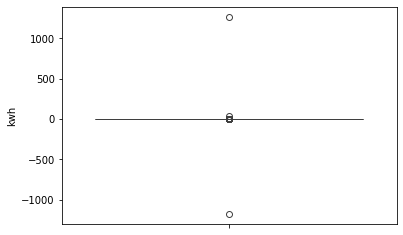

In [315]:
sns.boxplot(data["kwh"])

observation: very big outliers

In [316]:
print(len(data))
# remove outliers
data = data[abs(data["kwh"] - mean) < std]
print(len(data))
data.describe()

9400
9397


,kwh,temp,humidity_relative,pressure,cloudiness
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,0.244382,11.868096,81.025983,1013.790335,5.394700
std,0.450620,5.689320,12.750959,11.288117,2.422106
min,0.000000,-4.650000,31.366667,967.800000,0.000000
25%,0.000000,8.250000,73.400000,1007.725000,3.500000
50%,0.000000,11.175000,84.233333,1015.450000,6.500000
75%,0.249300,15.625000,91.100000,1021.575000,7.000000
max,2.098000,30.975000,99.033333,1041.275000,8.000000


In [317]:
# clean solar timestamp data
solar["timestamp"] = solar["timestamp"].apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d %H"))
# split timestamp into date and huor
solar["date"] = solar["timestamp"].apply(lambda date: date.split(" ")[0])
solar["hour"] = solar["timestamp"].apply(lambda date: date.split(" ")[1])
solar.drop(columns=["timestamp"], inplace=True)
solar.head()

,kwh,date,hour
0,0.54,2023-03-11,15
1,1.02,2023-03-11,16
2,1.17,2023-03-11,17
3,1.18,2023-03-11,18
4,1.18,2023-03-11,19


In [318]:
# change timestamps to difference in minutes from minimum timestamp
data["sunrise"] = data["sunrise"].apply(lambda time: time.hour * 60 + time.minute)
sunrise_min = data["sunrise"].min()
data["sunrise"] = data["sunrise"] - sunrise_min

data["sun_noon"] = data["sun_noon"].apply(lambda time: time.hour * 60 + time.minute)
sun_noon_min = data["sun_noon"].min()
data["sun_noon"] = data["sun_noon"] - sun_noon_min

data["sunset"] = data["sunset"].apply(lambda time: time.hour * 60 + time.minute)
sunset_min = data["sunset"].min()
data["sunset"] = data["sunset"] - sunset_min
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,date,hour,sunrise,sun_noon,sunset
0,0.54,6.85,54.833333,1012.025,6.0,2023-03-11,15,97,27,123
1,0.48,6.30,57.800000,1011.625,7.0,2023-03-11,16,97,27,123
2,0.15,5.95,60.366667,1011.500,7.0,2023-03-11,17,97,27,123
3,0.01,5.25,64.500000,1011.850,7.0,2023-03-11,18,97,27,123
4,0.00,4.85,68.633333,1011.650,7.0,2023-03-11,19,97,27,123


In [319]:
# convert date to datetime
data["date"] = data["date"].astype("datetime64")
# add month and day columns
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.dayofweek
# drop date column
data.drop("date", axis=1, inplace=True)
# convert hour to int
data["hour"] = data["hour"].astype("int")

## Date exploration

In [320]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9397 entries, 0 to 9704
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kwh                9397 non-null   float64
 1   temp               9397 non-null   float64
 2   humidity_relative  9397 non-null   float64
 3   pressure           9397 non-null   float64
 4   cloudiness         9397 non-null   float64
 5   hour               9397 non-null   int32  
 6   sunrise            9397 non-null   int64  
 7   sun_noon           9397 non-null   int64  
 8   sunset             9397 non-null   int64  
 9   month              9397 non-null   int64  
 10  day                9397 non-null   int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 844.3 KB


In [321]:
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,hour,sunrise,sun_noon,sunset,month,day
0,0.54,6.85,54.833333,1012.025,6.0,15,97,27,123,3,5
1,0.48,6.30,57.800000,1011.625,7.0,16,97,27,123,3,5
2,0.15,5.95,60.366667,1011.500,7.0,17,97,27,123,3,5
3,0.01,5.25,64.500000,1011.850,7.0,18,97,27,123,3,5
4,0.00,4.85,68.633333,1011.650,7.0,19,97,27,123,3,5


In [322]:
data.describe()

,kwh,temp,humidity_relative,pressure,cloudiness,hour,sunrise,sun_noon,sunset,month,day
count,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000,9397.000000
mean,0.244382,11.868096,81.025983,1013.790335,5.394700,11.569118,101.538576,51.059593,166.706821,6.187294,3.002235
std,0.450620,5.689320,12.750959,11.288117,2.422106,6.936588,60.711476,28.948484,108.604199,3.454015,2.002365
min,0.000000,-4.650000,31.366667,967.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,8.250000,73.400000,1007.725000,3.500000,6.000000,57.000000,25.000000,62.000000,3.000000,1.000000
50%,0.000000,11.175000,84.233333,1015.450000,6.500000,12.000000,101.000000,66.000000,164.000000,6.000000,3.000000
75%,0.249300,15.625000,91.100000,1021.575000,7.000000,18.000000,154.000000,77.000000,263.000000,9.000000,5.000000
max,2.098000,30.975000,99.033333,1041.275000,8.000000,23.000000,196.000000,83.000000,323.000000,12.000000,6.000000


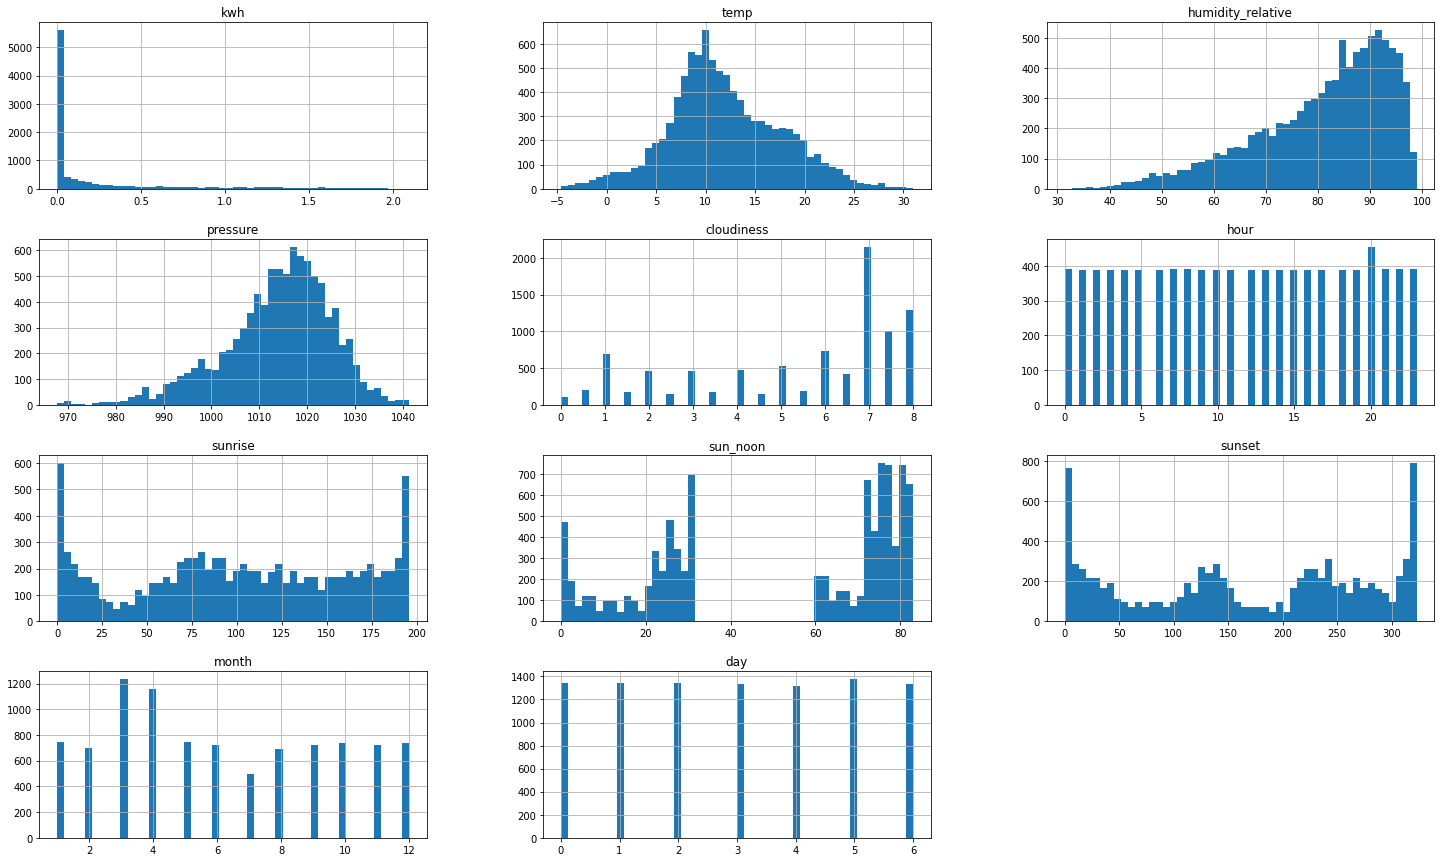

In [323]:
data.hist(bins=50, figsize=(25, 15))
plt.show()

Observations:
- kwh has a lot of 0 values
- month, day, hour and cloudiness are categorical

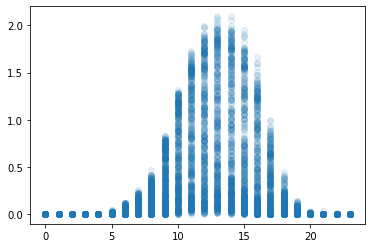

In [324]:
plt.scatter(data["hour"], data["kwh"], alpha=0.1)
plt.show()

Observation:
- kwh is clearly higher during the day

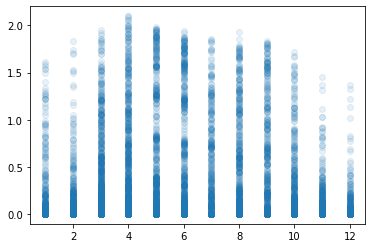

In [325]:
plt.scatter(data["month"], data["kwh"], alpha=0.1)
plt.show()

## Create a test set

In [326]:
X = data.drop(columns=["kwh"])
y = data["kwh"]

In [327]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(7517, 1880)

## Look for correlations

In [328]:
data = pd.concat([X_train, y_train], axis=1)

In [329]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["kwh"].sort_values(ascending=False).round(2)

kwh                  1.00
temp                 0.41
sunset               0.29
sun_noon             0.25
pressure             0.15
hour                 0.09
day                 -0.02
month               -0.05
cloudiness          -0.27
sunrise             -0.28
humidity_relative   -0.63
Name: kwh, dtype: float64

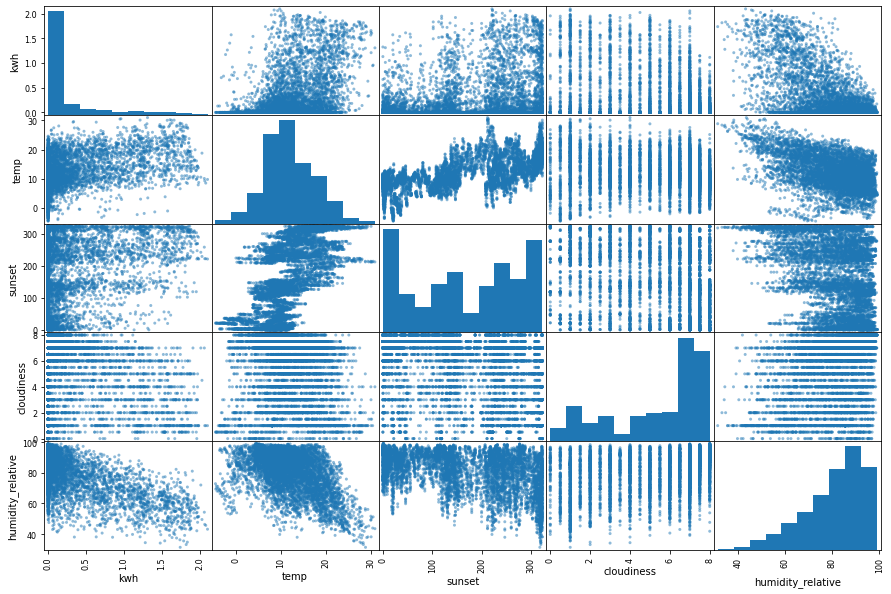

In [330]:
from pandas.plotting import scatter_matrix

attributes = ["kwh", "temp", "sunset", "cloudiness", "humidity_relative"]
scatter_matrix(data[attributes], figsize=(15, 10))
plt.show()

## Prepare the data

In [331]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7517 entries, 8482 to 7578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               7517 non-null   float64
 1   humidity_relative  7517 non-null   float64
 2   pressure           7517 non-null   float64
 3   cloudiness         7517 non-null   float64
 4   hour               7517 non-null   int32  
 5   sunrise            7517 non-null   int64  
 6   sun_noon           7517 non-null   int64  
 7   sunset             7517 non-null   int64  
 8   month              7517 non-null   int64  
 9   day                7517 non-null   int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 616.6 KB


In [332]:
# give categorical values their own type
X_train["month"] = X_train["month"].astype("category")
X_train["day"] = X_train["day"].astype("category")
X_train["hour"] = X_train["hour"].astype("category")
X_train["cloudiness"] = X_train["cloudiness"].astype("category")

In [333]:
data_num_ix = X_train.select_dtypes(include=[np.number]).columns
data_cat_ix = X_train.select_dtypes(include=["category"]).columns
print("Numerical columns: ", data_num_ix)
print("Categorical columns: ", data_cat_ix)

Numerical columns:  Index(['temp', 'humidity_relative', 'pressure', 'sunrise', 'sun_noon',
       'sunset'],
      dtype='object')
Categorical columns:  Index(['cloudiness', 'hour', 'month', 'day'], dtype='object')


In [41]:
# work in progress
from sklearn.base import BaseEstimator, TransformerMixin

class EncodeDate(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns.tolist()
        # X = check_array(X)
        return self

    def transform(self, X):
        assert "date" in self.feature_names_in_
        X = X.copy()
        X["date"] = pd.to_datetime(X["date"])
        X["month"] = X["date"].dt.month
        X["day"] = X["date"].dt.dayofweek
        X["month"] = X["month"].astype("category")
        X["day"] = X["day"].astype("category")
        X.drop("date", axis=1, inplace=True)
        return X

In [334]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

# log_pipeline = Pipeline([
#     ("impute", SimpleImputer(strategy="median")),
#     ("log", FunctionTransformer(np.log, inverse_func=np.exp)),
#     ("standardize", StandardScaler())
# ])

cat_pipline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")), 
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, data_num_ix),
    ("cat", cat_pipline, data_cat_ix)
])

## Model selection

### Linear Regression

In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square)

lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("lin_reg", TransformedTargetRegressor(LinearRegression(), transformer=sqrt_transformer))
])

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['temp', 'humidity_relative', 'pressure', 'sunrise', 'sun_noon',
       'sunset'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cloudiness', 'hour', 'month', 'day'], dtype='object'))])),
                ('lin_reg',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                            inverse_func=<ufunc 'square'>)))])

In [336]:
# cross validation for linear regression
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
print("Linear Regression cross validation RMSE: ", scores.mean())

Linear Regression cross validation RMSE:  0.1954018465504333


In [337]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

y_test_pred = lin_reg.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Linear Regression RMSE on test set: ", rmse)
print("Linear Regression MAE on test set: ", mae)

Linear Regression RMSE on test set:  0.21140296507019793
Linear Regression MAE on test set:  0.10990250248948653


In [46]:
y_train_pred = lin_reg.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_pred)
print("Linear Regression RMSE on train set: ", rmse)

Linear Regression RMSE on train set:  0.2097365887645879


In [338]:
def plot_predictions(y_test, y_pred, size):
    plt.figure(figsize=(12, 6))
    size_range = range(size)
    plt.plot(size_range, y_test[:size], label="Actual")
    plt.plot(size_range, y_pred[:size], label="Predicted")
    plt.legend()
    plt.show()

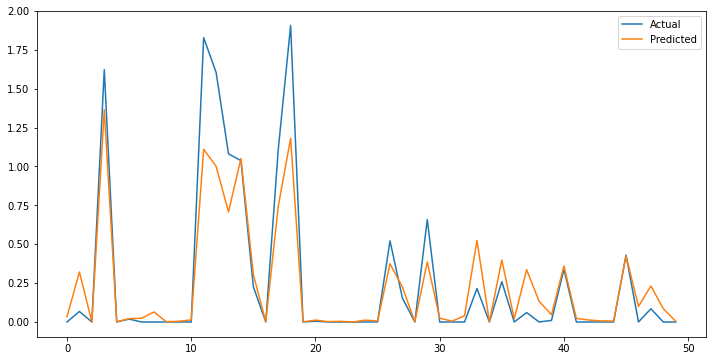

In [339]:
plot_predictions(y_test, y_test_pred, 50)

In [340]:
dump(lin_reg, "models/lin_reg.joblib")

['models/lin_reg.joblib']

In [ ]:
# Learning curves

### Polynomial Regression

In [344]:
# Polynomial Regression with different degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

degrees = [2, 3, 4, 5, 6, 7, 8]
best_score = np.inf
best_degree = 0
poly_regs = {}

for degree in degrees:
    new_num_pipeline = clone(num_pipeline)
    poly_features = PolynomialFeatures(degree=degree)
    new_num_pipeline.steps.append(["poly_features", poly_features])
    new_preprocessing = ColumnTransformer([
        ("num", new_num_pipeline, data_num_ix),
        ("cat", cat_pipline, data_cat_ix)
    ])
    poly_reg = Pipeline([
        ("preprocessing", new_preprocessing),
        ("lin_reg", TransformedTargetRegressor(LinearRegression(n_jobs=-1), transformer=sqrt_transformer))
    ])
    scores = -cross_val_score(poly_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
    print(f"Polynomial Regression degree {degree} cross validation RMSE: ", scores.mean())
    poly_reg.fit(X_train, y_train)
    poly_regs[f"poly_reg_{degree}"] = poly_reg
    y_train_pred = poly_reg.predict(X_train)
    rmse = root_mean_squared_error(y_train, y_train_pred)
    print(f"Polynomial Regression degree {degree} RMSE on training set: ", rmse)
    y_test_pred = poly_reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_test_pred)
    print(f"Polynomial Regression degree {degree} RMSE on test set: ", rmse)
    if scores.mean() < best_score:
        best_score = scores.mean()
        best_degree = degree

print("Best degree for polynomial regression: ", best_degree)

Polynomial Regression degree 2 cross validation RMSE:  0.18940952632087854
Polynomial Regression degree 2 RMSE on training set:  0.18791612699164867
Polynomial Regression degree 2 RMSE on test set:  0.21009782036927568
Polynomial Regression degree 3 cross validation RMSE:  0.18187982411689216
Polynomial Regression degree 3 RMSE on training set:  0.1779894600835306
Polynomial Regression degree 3 RMSE on test set:  0.19808825007244082
Polynomial Regression degree 4 cross validation RMSE:  0.17832990694040743
Polynomial Regression degree 4 RMSE on training set:  0.17164226043079903
Polynomial Regression degree 4 RMSE on test set:  0.19207146039648731
Polynomial Regression degree 5 cross validation RMSE:  0.17680524537242284
Polynomial Regression degree 5 RMSE on training set:  0.15992386631351224
Polynomial Regression degree 5 RMSE on test set:  0.18229199561344422
Polynomial Regression degree 6 cross validation RMSE:  0.18764473494884845
Polynomial Regression degree 6 RMSE on training se

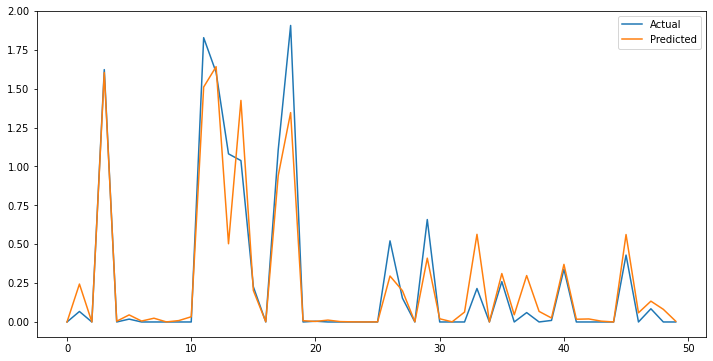

In [345]:
poly_reg = poly_regs[f"poly_reg_{best_degree}"]
plot_predictions(y_test, poly_reg.predict(X_test), 50)

In [346]:
dump(poly_reg, "models/test/poly_reg.joblib")

['models/test/poly_reg.joblib']

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("forest_reg", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = [
    # try 9 (3×3) combinations of hyperparameters with bootstrap set as True (default)
    {"forest_reg__n_estimators": [100, 200], "forest_reg__max_features": [10, 15, 20, 25]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Random Forest best parameters: ", grid_search.best_params_)
print("Random Forest best score: ", -grid_search.best_score_)

Random Forest best parameters:  {'forest_reg__max_features': 28, 'forest_reg__n_estimators': 400}
Random Forest best score:  0.16421522082996218


In [50]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_reg__max_features,param_forest_reg__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,38.257101,2.416345,0.138944,0.012315,28,400,"{'forest_reg__max_features': 28, 'forest_reg__...",-0.164712,-0.167861,-0.160577,-0.165778,-0.162148,-0.164215,0.002588,1
3,27.076160,0.255957,0.104509,0.001560,25,400,"{'forest_reg__max_features': 25, 'forest_reg__...",-0.163728,-0.166880,-0.160146,-0.166403,-0.164119,-0.164255,0.002395,2
4,30.553480,4.751903,0.112495,0.017223,28,300,"{'forest_reg__max_features': 28, 'forest_reg__...",-0.164892,-0.167694,-0.160574,-0.166172,-0.162376,-0.164342,0.002567,3
2,20.240650,0.258031,0.081447,0.002236,25,300,"{'forest_reg__max_features': 25, 'forest_reg__...",-0.163824,-0.167237,-0.160564,-0.166291,-0.164648,-0.164513,0.002309,4
1,25.025347,0.344242,0.107463,0.002851,22,400,"{'forest_reg__max_features': 22, 'forest_reg__...",-0.165103,-0.168601,-0.159223,-0.167916,-0.165046,-0.165178,0.003307,5
0,27.590852,9.884204,0.130424,0.064251,22,300,"{'forest_reg__max_features': 22, 'forest_reg__...",-0.165522,-0.168015,-0.160031,-0.167840,-0.164641,-0.165210,0.002899,6


In [51]:
model = grid_search.best_estimator_
feature_importances = model["forest_reg"].feature_importances_
sorted(zip(feature_importances, model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.4063601287963914, 'num__humidity_relative'),
 (0.10705549028255124, 'num__temp'),
 (0.04609456255730262, 'num__sunset'),
 (0.04180932534026202, 'cat__hour_13.0'),
 (0.03587439429132005, 'cat__hour_14.0'),
 (0.03466336066224549, 'cat__hour_15.0'),
 (0.03295087258055969, 'cat__hour_16.0'),
 (0.030509517502282764, 'num__pressure'),
 (0.02713606177148705, 'cat__hour_12.0'),
 (0.02646488079692358, 'num__sunrise'),
 (0.025592939910775526, 'num__sun_noon'),
 (0.02381942278318932, 'num__wind_peak_speed'),
 (0.023075582001057394, 'num__wind_speed'),
 (0.01887657843520636, 'cat__hour_17.0'),
 (0.01549908019774459, 'cat__hour_18.0'),
 (0.013622187718296678, 'cat__hour_11.0'),
 (0.013148436544486828, 'cat__hour_10.0'),
 (0.008383813802996616, 'cat__hour_9.0'),
 (0.00768948316576294, 'cat__hour_19.0'),
 (0.007208421464335474, 'cat__month_5.0'),
 (0.0030342956256264124, 'cat__cloudiness_7.0'),
 (0.002976586010518345, 'cat__hour_20.0'),
 (0.0026515182568163913, 'cat__hour_8.0'),
 (0.0024507381254

In [46]:
model = grid_search.best_estimator_
y_test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Random Forest RMSE on test set: ", rmse)
print("Random Forest MAE on test set: ", mae)

Random Forest RMSE on test set:  0.17525827095602767
Random Forest MAE on test set:  0.08744595509171474


In [47]:
preds = model.predict(X_train)
rmse = root_mean_squared_error(y_train, preds)
print("Random Forest RMSE on train set: ", rmse)

Random Forest RMSE on train set:  0.059456190855938965


In [ ]:
plot_predictions(y_test, y_test_pred, 50)

In [ ]:
dump(model, "models/test/random_forest.joblib")

### LinearSVR

In [354]:
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("svm_reg", TransformedTargetRegressor(LinearSVR(random_state=42, dual="auto", max_iter=1000000)))
])

param_grid = [
    {"svm_reg__regressor__C": [0.5, 1, 2], "svm_reg__regressor__epsilon": [0.05, 0.1, 0.5]}
]

grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

print("SVM best parameters: ", grid_search.best_params_)
print("SVM best score: ", -grid_search.best_score_)

SVM best parameters:  {'svm_reg__regressor__C': 2, 'svm_reg__regressor__epsilon': 0.1}
SVM best score:  0.25163005569039876


### SVR

In [358]:
from sklearn.svm import SVR

best_score = np.inf
best_degree = 0
svrs = {}

for degree in degrees:
    svr = Pipeline([
        ("preprocessing", new_preprocessing),
        ("svr", TransformedTargetRegressor(SVR(kernel="poly", degree=degree), transformer=sqrt_transformer))
    ])
    param_grid = [
        {"svr__regressor__C": [0.1, 1, 10], "svr__regressor__epsilon": [0.1, 1, 10]}
    ]
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring="neg_root_mean_squared_error")
    grid_search.fit(X_train, y_train)
    model = grid_search.best_estimator_
    score = -grid_search.best_score_
    print(f"SVR poly degree {degree} best parameters: ", grid_search.best_params_)
    print(f"Polynomial Regression degree {degree} cross validation RMSE: ", score)
    svrs[f"svr_poly_{degree}"] = model
    y_train_pred = model.predict(X_train)
    rmse = root_mean_squared_error(y_train, y_train_pred)
    print(f"Polynomial Regression degree {degree} RMSE on training set: ", rmse)
    y_test_pred = poly_reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_test_pred)
    print(f"Polynomial Regression degree {degree} RMSE on test set: ", rmse)
    if scores.mean() < best_score:
        best_score = scores.mean()
        best_degree = degree

print("Best degree for polynomial regression: ", best_degree)